# UNRC – TRATAMIENTO DIGITAL DE IMÁGENES
## Guia práctica Nº1

In [3]:
import cv2
from PIL import Image, ImageDraw, ImageFont
import time
import matplotlib

## Problema 1
Utilizando la librería OpenCv capturar una imagen sencilla desde la webcam y guardarla con el nombre “captura.jpg”

In [ ]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
cv2.imwrite('captura.jpg', image)
del(camera)

In [3]:
# A. Abrir la imagen "captura.jpg"
image = Image.open('captura.jpg')

# B. Imprimir dimensiones
print(f"Dimensiones de la imagen: {image.size}")

# C. Convertirla a escala de grises
grayscale_image = image.convert("L")
grayscale_image.save('captura_grayscale.jpg')

# D. Convertirla a modo binario
binary_image = grayscale_image.point(lambda x: 0 if x < 128 else 255, '1')
binary_image.save('captura_binary.jpg')

# E. Agregarle información de captura (Día, Hora y Año) y guardarla como "captura_ConInfo.jpg"
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
ahora = time.strftime("%c")
draw.text((10, 10), ahora, font=font, fill=(255, 255, 255))
image.save('captura_ConInfo.jpg')

# Mostrar la imagen con información de captura
image.show()

Dimensiones de la imagen: (640, 480)


### Imágenes Generadas

##### Imagen Original
![Imagen Original](captura.jpg)

##### Imagen en Escala de Grises
![Imagen en Escala de Grises](captura_grayscale.jpg)

##### Imagen en Modo Binario
![Imagen en Modo Binario](captura_binary.jpg)

##### Imagen con Información de Captura
![Imagen con Información de Captura](captura_ConInfo.jpg)


### Problema 1-1


#### Codigo 1

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture('MATI.mp4')
ret, frame = cap.read()
while ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(int(1/29.9)) & 0xFF == ord('q'):
        break
    ret, frame = cap.read()
cap.release()
cv2.destroyAllWindows()

Este código carga un video en formato MP4 y, en primer instancia, captura el primer frame del video cargado. El bucle while itera mientras haya frames disponibles, es decir, mientras ret sea True. En cada iteración, convierte el frame a escala de grises y lo muestra en una ventana. Luego, espera un tiempo determinado antes de pasar al siguiente frame, tiempo calculado para mantener la tasa de fotogramas del video. Además, verifica si se presionó la tecla "q", en cuyo caso el bucle se interrumpe y se sale del proceso de visualización. Finalmente, libera los recursos asociados al video y cierra la ventana utilizada.

#### Codigo 2

(512, 512)
(51, 51)


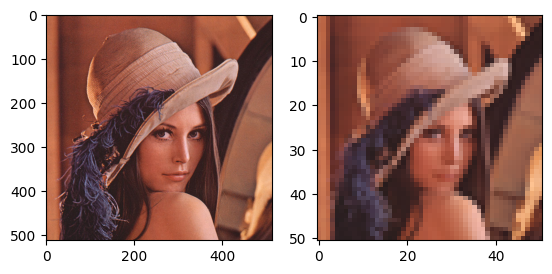

In [4]:
from PIL import Image
import requests
from matplotlib.pyplot import imshow, figure, subplot, show
url = "https://docs.opencv.org/3.4/lena.png"
im = Image.open(requests.get(url, stream=True).raw)
nx, ny = im.size
im2 = im.resize((int(nx*.10), int(ny*.10)), Image.Resampling.BICUBIC)
figure()
subplot(1,2,1)
imshow(im)
print(im.size)
subplot(1,2,2)
imshow(im2)
print(im2.size)
show()

Este código descarga una imagen desde una URL, la abre con la libreria PIL, y luego la redimensiona a un 10% de su tamaño original usando el método de interpolacion bicúbico. Depues utiliza matplotlib para crear una figura con dos subimagenes: la primera muestra la imagen original y la segunda muestra la imagen redimensionada.
Por ultimo imprime las dimensiones de ambas imágenes y muestra las subgráficas.

#### Codigo 3

In [3]:
import numpy as np
import cv2
# Open a sample video available in sample-videos
url="http://80.32.125.254:8080/cgibin/faststream.jpg?stream=half&fps=15&rand=COUNTER"
vcap = cv2.VideoCapture(url)
#if not vcap.isOpened():
# print "File Cannot be Opened"
while(True):
    # Capture frame-by-frame
    ret, frame = vcap.read()
    #print cap.isOpened(), ret
    if frame is not None:
        # Display the resulting frame
        cv2.imshow('Houston, Texas,Us',frame)
        # Press q to close the video windows before it ends if you want
        if cv2.waitKey(22) & 0xFF == ord('q'):
            break
    else:
        print ("Frame is None")
        break
# When everything done, release the capture
vcap.release()
cv2.destroyAllWindows()

Frame is None


Este código captura y muestra en tiempo real un flujo de video desde una URL y lo muestra como en el codigo 1.

## Problema 2


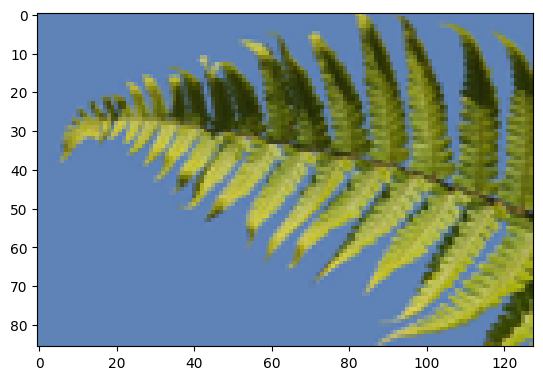

In [7]:
from PIL import Image
from PIL import ImageOps
from matplotlib.pyplot import imshow, show
pil_im = Image.open('hoja.jpg')
size=(128,128)
#USANDO RESIZE
imResize = pil_im.resize(size)
imResize.save('hojaResize.jpg')
imResize.show()
#USANDO FIT
imFit = ImageOps.fit(pil_im, size)
imFit.save('hojaFit.jpg')
imFit.show()
#USANDO THUMBNAIL
temp = pil_im.copy()
temp.thumbnail(size)
temp.save('hojaThumbnail.jpg')
temp.show()
imshow(temp)
show()

La diferencia entre los diferentes formas de **crear las minaturas** son:

*Resize:* Redimensiona la imagen a un tamaño específico sin mantener la relación de aspecto.

*ImageOps.fit:*  Recorta y redimensiona la imagen para que se ajuste a un tamaño específico manteniendo la relación de aspecto.

*Thumbnail:*  Redimensiona la imagen para que encaje dentro de un tamaño específico manteniendo la relación de aspecto sin recorte.

La diferencia entre los diferentes metodos de **mostrar la imagen** son:

*Imshow (Matplotlib):*  Muestra imágenes en un contexto gráfico(Terminal), útil para análisis y visualización científica.

*Show (PIL):*  Muestra imágenes en una ventana independiente usando el visor del sistema operativo, adecuado para visualización rápida.

## Problema 3
#### Rotar imagen 90º y guardar con 90% de calidad

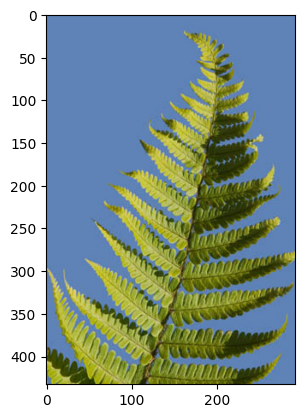

In [15]:
from PIL import Image
from matplotlib.pyplot import imshow, show

pil_im = Image.open('hoja.jpg')

rotated_im = pil_im.rotate(-90, expand=True)  # expand=True ajusta el tamaño de la imagen para que se ajuste a la nueva orientación

imshow(rotated_im)
show()

rotated_im.save('hoja_rotada.jpg', quality=90)


#### Guardar imagen con 25% de calidad

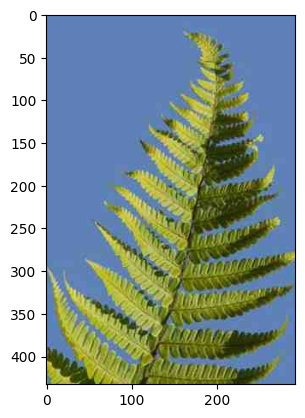

In [5]:
from PIL import Image
from matplotlib.pyplot import imshow, show
image25 = Image.open('hoja_rotada.jpg')
image25.save('hoja_25.jpg', quality=25)
image25 = Image.open('hoja_25.jpg')
imshow(image25)
show()

Si la image se guarda con un 25 de calidad, la imagen pierde mucha definicion y no se logra ver practicamente ningun detalle.